In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [3]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [4]:
x_train.shape

(25000, 100)

In [5]:
y_test.shape

(25000,)

In [6]:
y_train.shape

(25000,)

In [7]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
y_test_one_hot.shape

(25000, 2)

In [10]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 32)           3104      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 16)                51216     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 694,354
Trainable params: 694,354
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [23]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 66ms/step - loss: 0.5178 - acc: 0.7246 - val_loss: 0.3748 - val_acc: 0.8298
Epoch 2/10
157/157 [==============================] - 10s 65ms/step - loss: 0.2756 - acc: 0.8860 - val_loss: 0.3848 - val_acc: 0.8378
Epoch 3/10
157/157 [==============================] - 10s 65ms/step - loss: 0.1182 - acc: 0.9582 - val_loss: 0.5637 - val_acc: 0.8054
Epoch 4/10
157/157 [==============================] - 10s 65ms/step - loss: 0.0261 - acc: 0.9926 - val_loss: 0.7339 - val_acc: 0.8238
Epoch 5/10
157/157 [==============================] - 10s 65ms/step - loss: 0.0082 - acc: 0.9976 - val_loss: 0.9208 - val_acc: 0.8040
Epoch 6/10
157/157 [==============================] - 10s 65ms/step - loss: 0.0025 - acc: 0.9994 - val_loss: 1.0964 - val_acc: 0.7994
Epoch 7/10
157/157 [==============================] - 10s 65ms/step - loss: 7.6001e-04 - acc: 0.9997 - val_loss: 1.2033 - val_acc: 0.8092
Epoch 8/10
157/157 [==============================] - 10s 

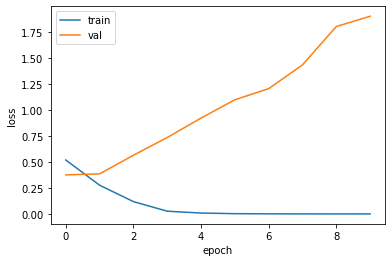

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

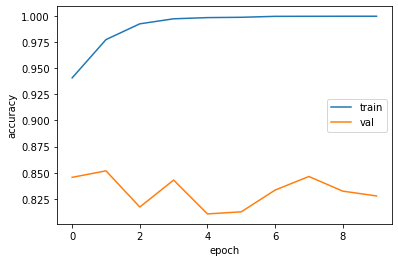

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [40]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 22s 28ms/step - loss: 1.3305 - acc: 0.8301 9s - - ETA: 7s - loss: 1.3697 -  - ETA: 7s - loss: 1.3616 - acc: - ETA: 6s - loss


In [10]:
print('test_acc:', test_acc)

test_acc: 0.84544
